In [25]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DATA SCIENCE FINAL PROJECT/Bitcoin Historical Data From 2012 to 2020 .csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go



In [17]:
data = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE FINAL PROJECT/Bitcoin Historical Data From 2012 to 2020 .csv")
data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')

data = data.dropna()
data.Timestamp = data.Timestamp.apply(lambda x: dt.datetime(x.year,x.month,x.day))
data.head(500)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
45124,2012-01-31,5.85,5.85,5.85,5.85,15.656410,91.590000,5.850000
45225,2012-01-31,5.85,5.85,5.85,5.85,7.166826,41.925932,5.850000
45226,2012-01-31,5.90,6.00,5.69,6.00,15.870670,93.610532,5.898335
45227,2012-01-31,6.01,6.17,5.69,6.17,24.721214,150.520045,6.088700


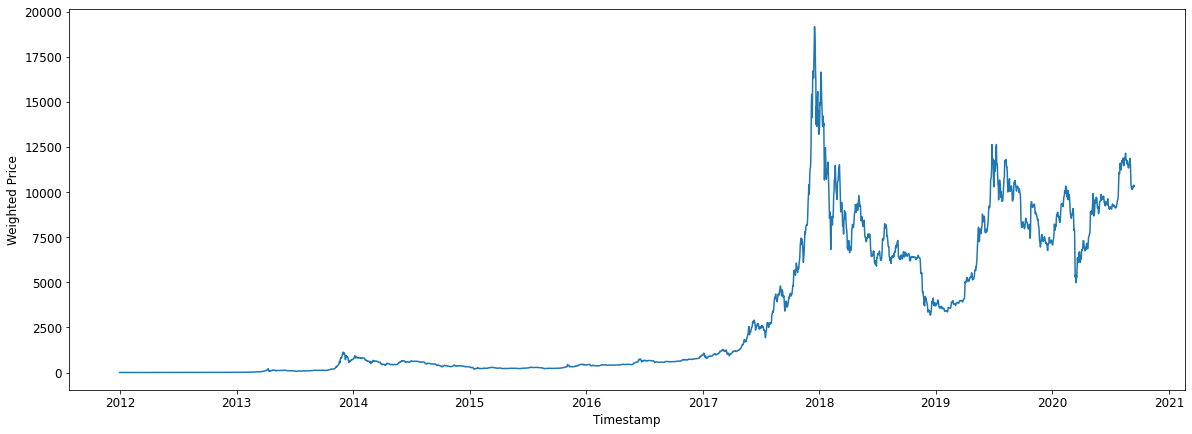

In [3]:
data_days_avg = data.groupby("Timestamp", as_index = False).agg("mean")

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(20, 7))
ax = sns.lineplot(x="Timestamp", y="Weighted_Price", data=data_days_avg)
ax.set(ylabel="Weighted Price")
plt.show()

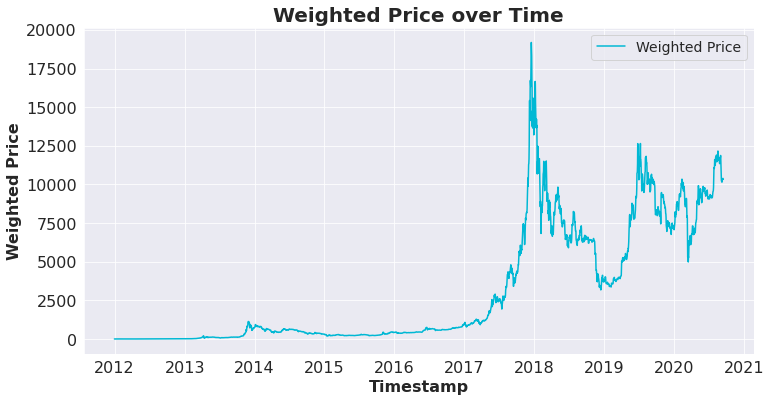

In [41]:
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.lineplot(x="Timestamp", y="Weighted_Price", data=data_days_avg, color="#00b8d4")
ax.set_title("Weighted Price over Time", fontsize=20, fontweight="bold")
ax.set_xlabel("Timestamp", fontsize=16, fontweight="bold")
ax.set_ylabel("Weighted Price", fontsize=16, fontweight="bold")
ax.legend(["Weighted Price"], fontsize=14)
plt.show()


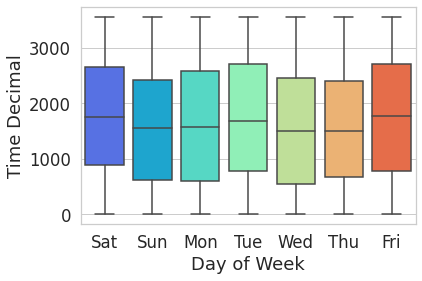

In [67]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

    
data = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE FINAL PROJECT/Bitcoin Historical Data From 2012 to 2020 .csv")
data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')
data = data.dropna()

dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['Day of Week'] = data['Timestamp'].dt.dayofweek.map(dayOfWeek)

data['Time Decimal'] = data['Timestamp'].dt.hour + data['Timestamp'].dt.minute*60


daily_lows = data[data.groupby([pd.Grouper(key='Timestamp', freq='D')])['Weighted_Price'].transform(min) == data['Weighted_Price']]
sns.boxplot(x="Day of Week", y="Time Decimal", data=daily_lows, palette='rainbow')

In [ ]:
box_tracer = []
for key, day in dayOfWeek.items():
    box_tracer.append(
        go.Box(
            y = daily_lows[daily_lows['Day of Week'] == day]['Time Decimal'],
            name = day
        )
    )
iplot(box_tracer)

: 

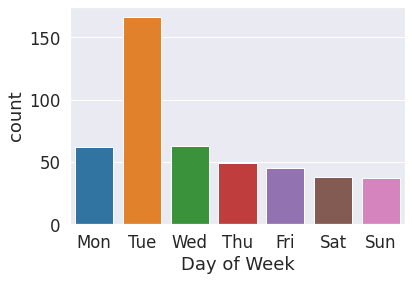

In [56]:
data = pd.read_csv("/content/drive/MyDrive/DATA SCIENCE FINAL PROJECT/Bitcoin Historical Data From 2012 to 2020 .csv")
data.Timestamp = pd.to_datetime(data.Timestamp, unit='s')
data = data.dropna()

dayOfWeek={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['Day of Week'] = data['Timestamp'].dt.dayofweek.map(dayOfWeek)


idx = data.groupby([pd.Grouper(key='Timestamp', freq='W-MON')])['Weighted_Price'].transform(min) == data['Weighted_Price']

weekly_lows = data[idx].groupby([pd.Grouper(key='Timestamp', freq='D')]).first().reset_index()
weekly_lows = weekly_lows.dropna()


sns.countplot(x='Day of Week',data=weekly_lows, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
